In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
transform  = transforms.ToTensor()

In [9]:
train_data = datasets.MNIST(root='/Users/elifseven/Desktop/PytorchUdemy/Data', train = True,download = True, transform = transform)

In [11]:
test_data = datasets.MNIST(root='/Users/elifseven/Desktop/PytorchUdemy/Data',train = False, download=True, transform = transform)

In [13]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /Users/elifseven/Desktop/PytorchUdemy/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [15]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: /Users/elifseven/Desktop/PytorchUdemy/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [18]:
#when working work with images we want relatively small batches
#of batch size of four is not common, depends factor hardwware

In [20]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [42]:
conv1 = nn.Conv2d(1,6,3,1) #---> 6 filters --> pooling -->conv2
# 1 COLOR CHANNEL, 6 FILTERS (OUTPUT CHANNEL), 3BY3 KERNEL, STRIDE=1
# 1 input channel is because you are daling with grayscale images
#and we can expand color images
# 6 output channel for feature extraction known as feature maps
# 3: 3*3 filter
# 1: step size to one, step size our stride, like padding

conv2 = nn.Conv2d(6,16,3,1) #6 Input Filters Conv1, 16 filters, 3by3, stride=1
# conv1 to end up taking the results of the first compositional layer after
#it's been passed through a pulling function
# This 16 comes from our kind of arbitrary choice that I want to expand it to 16 filters.


In [43]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [44]:
x = X_train.view(1,1,28,28) # ---> 4D (batch of 1 image)

In [45]:
x #this is 1 image, 1 batch, 1 color channel image and 28*28

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [46]:
x = F.relu(conv1(x))
# it has been activated through the rectified linear unit function
#we get back the shape of one by six by 26 26
#

In [47]:
x.shape #this  first two dimensions make sense to us because
#we hove 1 single image and then 6 filters
# Why do we only have 26 by 26 wasn't our original image 28
# Becuase, we recall that after you pass over or perform a convolution 
# of this kernel you may lose information on the borders

torch.Size([1, 6, 26, 26])

In [48]:
# next step is to pass this through a pooling layer

x = F.max_pool2d(x,2,2)

In [49]:
x.shape 
# where is this 13 13 coming from well due to the size of the kernel
#being a two by two kernel of a start 2
# essentially means, you are cutting the size in half of 26
#because pooling function

torch.Size([1, 6, 13, 13])

In [51]:
x = F.relu(conv2(x))

In [52]:
x.shape

# 1 input, we want 16 filters off conv layer, we loose pixel -> 11

torch.Size([1, 16, 11, 11])

In [54]:
x = F.max_pool2d(x,2,2)

In [56]:
x.shape
# 1 image with 16 filters for first conv. layer
# 11/2 : 5.5 -> 5

torch.Size([1, 16, 2, 2])

In [58]:
11/2

5.5

In [66]:
 (((28-2)/2)-2)/2

5.5

In [68]:
x.shape

torch.Size([1, 16, 2, 2])

In [72]:
x.view(-1,16*5*5).shape
# negative values assumes whatever that first batch size is
# last final shape as we feed into that last fully connected layer

RuntimeError: shape '[-1, 400]' is invalid for input of size 64

In [76]:
class ConvolutionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)  #must be 10, because we have 10 classes
        
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1, 16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X,dim = 1)

In [78]:
torch.manual_seed(42)
model = ConvolutionNetwork()
model

ConvolutionNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [80]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [83]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [90]:
import time
start_time = time.time()

# VARIABLES (TRACKERS)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


#FOR LOOP EPOCHS
for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    
    #TRAIN
    for b, (X_train,y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train) # NOT FLATTEN!!!
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum() #True/False  0 sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 == 0:
            print(f"EPOCH: {i} BATCH {b} LOSS: {loss.item()}")
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    #TEST
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

EPOCH: 0 BATCH 600 LOSS: 0.0002758170594461262
EPOCH: 0 BATCH 1200 LOSS: 0.0004464815719984472
EPOCH: 0 BATCH 1800 LOSS: 0.008576824329793453
EPOCH: 0 BATCH 2400 LOSS: 0.0012459043646231294
EPOCH: 0 BATCH 3000 LOSS: 0.10632976144552231
EPOCH: 0 BATCH 3600 LOSS: 7.021472993073985e-05
EPOCH: 0 BATCH 4200 LOSS: 0.004710509907454252
EPOCH: 0 BATCH 4800 LOSS: 0.00041093784966506064
EPOCH: 0 BATCH 5400 LOSS: 0.0005515643279068172
EPOCH: 0 BATCH 6000 LOSS: 0.0013925668317824602
EPOCH: 1 BATCH 600 LOSS: 0.0008345398236997426
EPOCH: 1 BATCH 1200 LOSS: 0.00040001276647672057
EPOCH: 1 BATCH 1800 LOSS: 6.511567335110158e-05
EPOCH: 1 BATCH 2400 LOSS: 0.09260962158441544
EPOCH: 1 BATCH 3000 LOSS: 9.750872413860634e-05
EPOCH: 1 BATCH 3600 LOSS: 0.0007036623428575695
EPOCH: 1 BATCH 4200 LOSS: 0.005068499594926834
EPOCH: 1 BATCH 4800 LOSS: 0.0022698412649333477
EPOCH: 1 BATCH 5400 LOSS: 0.002218006644397974
EPOCH: 1 BATCH 6000 LOSS: 0.028341632336378098
EPOCH: 2 BATCH 600 LOSS: 0.0009234707686118782
EP

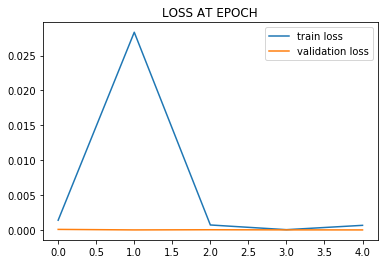

In [91]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label = 'validation loss')
plt.title('LOSS AT EPOCH')
plt.legend()

#we can see, there was really high train loss and then that sudden dip
#but,the validation lost looked really cool though it looked really good


In [93]:
#Evaluate all the test data 

test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [95]:
with torch.no_grad():
    correct = 0
    
    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [97]:
correct.item()/len(test_data)

0.9872

In [98]:
# Display confusion matrix

# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 976    1    0    0    0    2    6    0    3    0]
 [   0 1127    3    1    0    0    5    4    0    0]
 [   1    1 1023    0    0    0    0    5    3    1]
 [   0    1    1 1001    0    9    0    2    1    7]
 [   0    0    1    0  977    0    4    1    0    5]
 [   0    2    0    3    0  874    5    0    2    7]
 [   1    1    0    0    1    1  937    0    0    0]
 [   1    2    4    2    0    1    0 1016    1    7]
 [   1    0    0    3    0    3    1    0  963    4]
 [   0    0    0    0    4    2    0    0    1  978]]


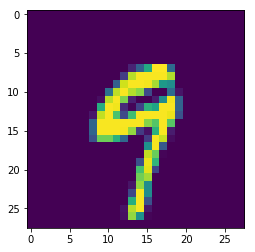

In [103]:
plt.imshow(test_data[2019][0].reshape(28,28))

In [106]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2019][0].view(1,1,28,28))

In [109]:
new_prediction.argmax()
#it was index nine

tensor(9)

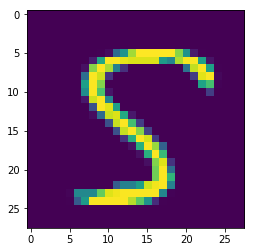

In [111]:
plt.imshow(test_data[333][0].reshape(28,28))

In [112]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[333][0].view(1,1,28,28))

In [113]:
new_prediction.argmax()

tensor(5)

In [115]:
test_data[333][1]

5